# GAN 첫걸음
## Part 1 파이토치와 신경망 기초

### Chapter 1 파이토치 기본
- 구글 코랩
- 파이토치 텐서
- 파이토치를 이용한 자동 기울기 계산
- 계산 그래프
- 핵심 정리

### Chapter 2 파이토치로 만드는 첫 번째 신경망
- MNIST 이미지 데이터셋
- MNIST 데이터 얻기
- 데이터 살펴보기
- 간단한 신경망
- 훈련 시각화하기
- MNIST 데이터셋 클래스
- 분류기 훈련시키기
- 신경망에 쿼리하기
- 분류기의 성능

### Chapter 3 성능 향상 기법
- 손실 함수
- 활성화 함수
- 옵티마이저
- 정규화
- 복합적 성능 향상 기법
- 핵심 정리

### Chapter 4 CUDA 기초
- Numpy V.S Python
- Nvidia CUDA
- CUDA를 파이썬에서 사용하기
- 핵심 정리

## Part 2 튼튼한 GAN 만들기

### Chapter 5 GAN 개념
- 이미지 생성하기
- 적대적 훈련
- GAN 훈련
- 훈련하기 어려운 GAN
- 핵심 정리

### Chapter 6 단순한 1010 패턴
- 실제 데이터 소스
- 판별기 만들기
- 판별기 테스트하기
- 생성기 만들기
- 생성기 결과 확인하기
- GAN 훈련하기
- 핵심 정리

### Chapter 7 손으로 쓴 숫자 훈련
- 테이터셋 클래스
- MNIST 판별기
- 판별기 테스트하기
- MNIST 생성기
- 생성기 결과 확인하기
- GAN 훈련하기
- 모드 붕괴
- GAN 훈련 성능 향상하기
- 시드로 실험하기
- 핵심 정리

### Chapter 8 얼굴 이미지
- 컬러 이미지
- CelebA 데이터셋
- 계층적 데이터 형식
- 데이터 가져오기
- 데이터 살펴보기
- 데이터셋 클래스
- 판별기
- 판별기 테스트하기
- GPU 가속
- 생성기
- 생성기 결과 확인하기
- GAN 훈련하기
- 핵심 정리

## Part 3 흥미로운 GAN 기법

### Chapter 9 합성곱 GAN
- 메모리 소비
- 지역화된 이미지 특성
- 합성곱 필터
- 커널 가중치 학습하기
- 특성의 계층구조
- MNIST CNN
- CelebA CNN
- 각자 실험해보기
- 핵심 정리

### Chapter 10 조건부 GAN
- 조건부 GAN 구조
- 판별기
- 생성기
- 훈련 반복문
- 차트 그리기
- 조건부 GAN 결과 확인하기

### Chapter 11 결론
- GAN을 사용하는 데 대한 책임


## Appendix

### 이상적인 손실값
- MSE
- BCE

### GAN의 우도 학습
- GAN은 훈련 데이터를 기억하지 않는다.
- 단순화된 예제
- 확률분포로 이미지 생성하기
- 픽셀 모음에서 이미지 특성 학습
- 많은 모드 & 모드 붕괴

### 합성곱 예제

### 불안정한 학습
- 경사 하강법은 GAN 훈련에 적합한가?
- 간단한 적대 예제
- 경사 하강법은 적대 게임에 이상적이지 않다.
- 왜 원 궤적인가?

# Part 1 파이토치와 신경망 기초

In [1]:
import torch

In [2]:
x = 3.5
y = x * x + 2
print(x, y)

3.5 14.25


In [3]:
x = torch.tensor(3.5)
print(x)

tensor(3.5000)


In [4]:
y = x + 3
print(y)

tensor(6.5000)


In [5]:
x = torch.tensor(3.5, requires_grad=True)
print(x)

tensor(3.5000, requires_grad=True)


In [6]:
y = (x-1) * (x-2) * (x-3)
print(y)

tensor(1.8750, grad_fn=<MulBackward0>)


Pytorch는 tensor가 어디서 왔고 어떻게 계산되는지 기억한다. 위 예제에서 y가 x에서 왔다는 사실을 기억한다. 

Numpy 행렬이였다면, 파이썬 y가 한 번 x로 계산되고 나면, 그 결과가 y에 저장되어 있다는 사실만 중요하고, 과정을 저장하는 것은 불필요하기 때문이다.

In [7]:
y.backward()

In [10]:
# x = 3.5 일 때의 기울기
x.grad

tensor(5.7500)

requires_grad=True 옵션은 Pytorch에게 x에 대해 기울기를 계산 하도록 하는 기능

Pytorch Tensor가 하는 일)
- 기본적인 숫자 이상의 정보를 저장 (e.g. 기울기, etc...) -> 텐서 사이의 연관성 정보를 저장 기능
- 이 변수에 영향을 주고받는 텐서에 대해 수식 등 추가적인 정보를 저장 -> 자동 미분 계산 기능

In [11]:
x = torch.tensor(3.5, requires_grad=True)
y = x * x
z = 2*y + 3

In [12]:
z.backward()

In [13]:
print(x.grad)

tensor(14.)


In [14]:
a = torch.tensor(2.0, requires_grad=True)
b = torch.tensor(1.0, requires_grad=True)

x = 2*a + 3*b
y = 5*a*a + 3*b*b*b
z = 2*x + 3*y

In [15]:
z.backward()

In [16]:
a.grad

tensor(64.)

## Chapter 2 파이토치로 만드는 첫 번째 신경망

### MNIST Image dataset

In [15]:
import pandas as pd

df = pd.read_csv("./mnist_data/mnist_train.csv", header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


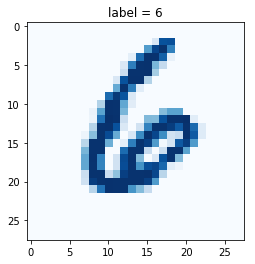

In [18]:
import matplotlib.pyplot as plt

row = 13
data = df.iloc[row]

label = data[0]

img = data[1:].values.reshape(28, 28)
plt.title("label = " + str(label))
plt.imshow(img, interpolation="none", cmap='Blues')
plt.show()

어떠한 신경망을 만들든 항상 Pytorch의 torch.nn을 상속받아 클래스를 만들어야 한다.

이를 상속받으면 torch는 계산 그래프를 만들고, 훈련 시 가중치를 조정하는 과정은 알아서 진행된다. 

In [2]:
import torch
import torch.nn as nn

In [6]:
class Classifier(nn.Module):
    def __init__(self):
        # 부모 클래스 초기화 (__init__()-> 생성자(constructor))
        super().__init__()
        
        # 신경망 레이어 정의
        self.model = nn.Sequential(
        nn.Linear(784, 200),
        nn.Sigmoid(),
        nn.Linear(200, 10),
        nn.Sigmoid()
        )
        
        # Set the Loss Function
        self.loss_function = nn.MSELoss()
        
        # Set the Optimizer
        self.optimizer == torch.optim.SGD(self.parameters(), lr=0.01)
        
        self.counter = 0
        self.progress = []
        
        def forward(self, inputs):
            # 모델 실행
            return self.model(inputs)

### 간단한 신경망

오차(error)와 손실(Loss)는 혼용되어 사용되고, 큰 의미의 차이는 없다. 엄밀하게 따져보면, 오차는 정답과 예측값 사이의 차이 자체를 의미하고, 손실은 궁극적으로 풀어야 할 문제에 대한 오차라는 개념으로 이해하자!

SGD Optimizer에 모든 학습 파라미터를 전달하자. Pytorch에서는 네트워크에서 정보를 전달하는 데에 forward() 함수를 사용해야 한다.

네트워크를 훈련시키기 위해 train() 함수를 만들자.

train() 메서드에는 신경망이 전달할 **입력**이 필요, 원하는 **목표(target)** 출력도 필요. 이를 통해 **손실**을 계산

In [10]:
def train(self, inputs, targets):
    # 신경망 출력 계산
    outputs = self.forward(inputs)
    
    # 손실 계산
    loss = self.loss_function(outputs, targets)
    
    self.counter += 1
    if (self.counter % 10 == 0):
        self.progress.append(loss.item())
        pass
    if (self.counter % 10000 == 0):
        print("counter = ", self.counter)
        pass
    
    # 기울기 초기화, 역전파 실행, 가중치 갱신
    self.optimizer.zero_grad()
    loss.backward()
    self.optimizer.step()
    
    def plot_progress(self):
        df = pandas.DataFrame(self.progress, columns=['loss'])
        df.plot(ylim(0, 1.0), figsize=(16, 8), alpha=0.1, marker='.',
               grid=True, yticks=(0, 0.25, 0.5))
        pass

train() 메서드가 제일 먼저하는 것은 forward()로 입력값을 신경망에 전달해 결과를 얻는다. 그 결과는 손실함수를 계산하기 위해 사용된다.

- 계산 그래프의 기울기는 optimizer.zero_grad()를 통해 모두 0으로 초기화된다.

- 신경망의 기울기는 손실함수의 loss.backward()를 통해 계산된다.

- 이 기울기는 optimizer.step()을 통해 신경망의 학습 파라미터를 갱신하는데 사용된다.

**신경망 훈련시 매번 기울기는 0으로 설정되어 있어야 한다. 그렇게 하지 않으면 값들은 loss.backward()를 따라 계산 시 마다 쌓인다.**

### 훈련 시각화하기

훈련이 잘 진행되는지 확인하는 방법 중 하나는 손실을 계속 모니터링 하는 것이다. 

In [39]:
# 종합
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
    
        self.model = nn.Sequential(
            nn.Linear(784, 200),
            nn.Sigmoid(),
            nn.Linear(200, 10),
            nn.Sigmoid()
        )
        
        self.loss = nn.MSELoss()
        self.optimizer = torch.optim.SGD(self.parameters(), lr=0.01)
        
        self.counter = 0
        self.progress = []
        
    def forward(self, inputs):
        return self.model(inputs)

    def train(self, inputs, targets):
        outputs = self.forward(inputs)
        loss = self.loss(outputs, targets)
        self.counter += 1
        if (self.counter % 10 == 0):
            self.progress.append(loss.item())
        if (self.counter % 10000 == 0):
            print("counter = ", self.counter)
            pass

        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

    def plot_progress(self):
        df = pandas.DataFrame(self.progress, columns=['loss'])
        df.plot(ylim=(0, 1.0), figsize=(16, 8), alpha=0.1, marker='.', 
               grid=True, yticks=(0, 0.25, 0.5))
        pass
        

### MNIST 데이터셋 클래스

Pytorch는 데이터르 shuffle, 병렬로 데이터를 부르거나, 혹은 배치 작업 등을 간편하게 한다.

torch.utils.data.DataLoader를 통해서 이런 작업을 할 수 있다. 

개발자는 torch.utils.data.DataSet 객체로 이를 사용하게 된다.

nn.Module에서 신경망 클래스를 상속받고 forward() 함수를 구현했던 것 처럼, 

Dataset 클래스에서 데이터셋을 상속받을 때는 두 가지 특수 메서드를 구현해야한다.

- \__len__(): 데이터셋의 길이를 반환하다.

- \__getitem__(): 데이터셋의 n번째 아이템을 반환한다.

MnistDataset 클래스를 만들고 __len__() 메서드를 구현하면 Pytorch는 len(mnist_dataset)을 통해 데이터셋의 크기를 알 수 있다. 

__getitem__()은 mnist_dataset[3] 처럼 특정 아이템을 index를 통해 접근 가능하게 한다.

In [7]:
import pandas as pd
from torch.utils.data import Dataset

class MnistDataset(Dataset):
    def __init__(self, csv_file):
        self.data_df = pd.read_csv(csv_file, header=None)
        pass
    
    def __len__(self):
        return len(self.data_df)
    
    def __getitem__(self, index):
        label = self.data_df.iloc[index, 0]
        target = torch.zeros((10))
        target[label] = 1.0
        
        # 0 ~ 255의 이미지를 0 ~ 1로 정규화
        image_values = torch.FloatTensor(self.data_df.iloc[index, 1:].values) / 255.0
        
        return label, image_values, target
    
    def plot_image(self, index):
        img = self.data_df.iloc[index, 1:].values.reshape(28, 28)
        plt.title("label = " + str(self.data_df.iloc[index, 0]))
        plt.imshow(img, interpolation="none", cmap="Blues")
        pass
    
    pass

In [8]:
mnist_dataset = MnistDataset('./mnist_data/mnist_train.csv')

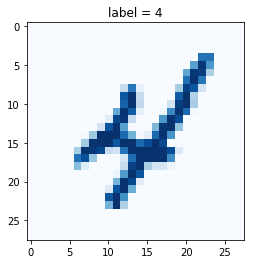

In [44]:
mnist_dataset.plot_image(9)

In [45]:
mnist_dataset[100][1].shape

torch.Size([784])

### 분류기 훈련시키기

In [46]:
C = Classifier()

epochs = 3

for i in range(epochs):
    print("training epoch", i+1, "of", epochs)
    for label, image_data_tensor, target_tensor in mnist_dataset:
        C.train(image_data_tensor, target_tensor)
        pass

training epoch 1 of 3
counter =  10000
counter =  20000
counter =  30000
counter =  40000
counter =  50000
counter =  60000
training epoch 2 of 3
counter =  70000
counter =  80000
counter =  90000
counter =  100000
counter =  110000
counter =  120000
training epoch 3 of 3
counter =  130000
counter =  140000
counter =  150000
counter =  160000
counter =  170000
counter =  180000


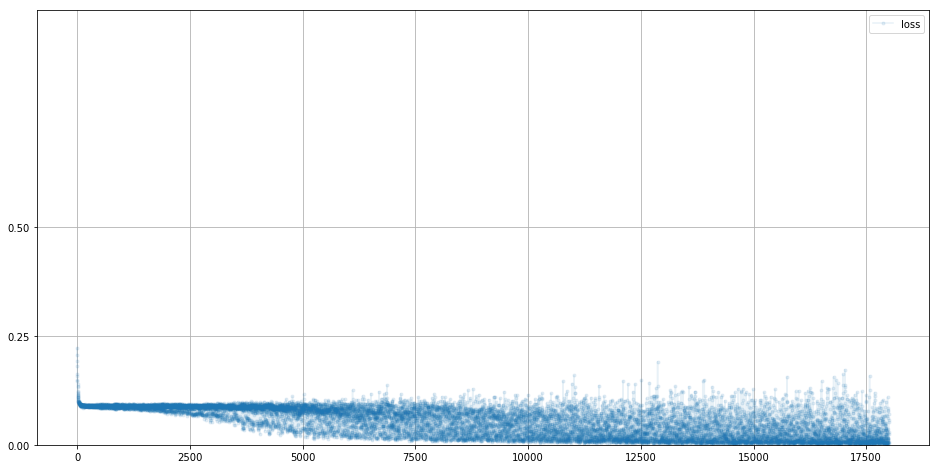

In [48]:
import pandas 

C.plot_progress()

신명망은 본질적으로 **확률과정(random process)** 이다. 따라서 매번 위의 figure가 같을 순 없다.

### 신경망에 쿼리하기

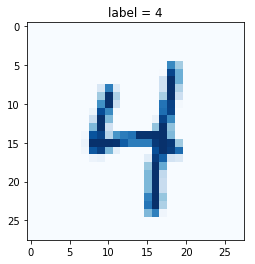

In [50]:
mnist_test_dataset = MnistDataset('./mnist_data/mnist_test.csv')

record = 19
mnist_test_dataset.plot_image(record)

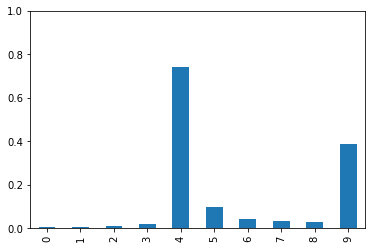

In [53]:
image_data = mnist_test_dataset[record][1]

output = C.forward(image_data)

pandas.DataFrame(output.detach().numpy()).plot(kind='bar', legend=False, ylim=(0,1))

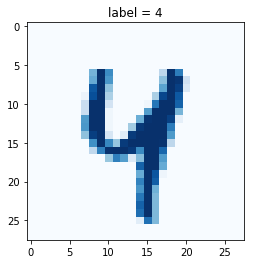

In [54]:
mnist_test_dataset = MnistDataset('./mnist_data/mnist_test.csv')

record = 42
mnist_test_dataset.plot_image(record)

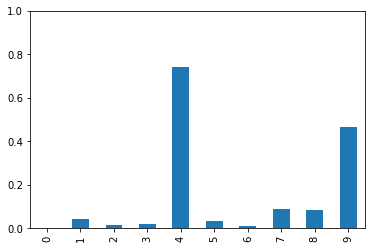

In [55]:
image_data = mnist_test_dataset[record][1]

output = C.forward(image_data)

pandas.DataFrame(output.detach().numpy()).plot(kind='bar', legend=False, ylim=(0,1))

### 분류기의 성능

모델이 얼마나 제대로 분류하는지 성능을 확인하기 위해서는, 모든 10,000개 테스트 이미지에 대해 얼마나 많이 맞히는지 확인하면 된다.
신경망의 결과를 실제 정답과 비교해서 이를 확인할 수 있다.

In [56]:
score = 0
items = 0

for label, image_data_tensor, target_tensor in mnist_test_dataset:
    answer = C.forward(image_data_tensor).detach().numpy()
    if (answer.argmax() == label):
        score += 1
        pass
    items += 1
    pass

print(score, items, score/items)

8657 10000 0.8657


## Chapter 3 성능 향상 기법

### 손실함수

섭씨 온도 같은 **연속적인 숫자** 에 대해 결과를 출력하도록 신경망이 구성되어 있다면 **평균제곱오차법(Mean Squared Error, MSE)** 가 적절한 손실함수이다. 이 문제를 **회귀(regression)** 이라고 한다.

이미지가 고양이 인지 아닌지 같은 **이산형 결과** 를 내야한다면 **이진 교차 엔트로피(Binary Cross Entropy, BCE)** 가 적절한 손실함수이다. 
이 문제를 **분류(classification)** 이라고 한다.

In [58]:
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.model = nn.Sequential(
            nn.Linear(784, 200),
            nn.Sigmoid(),
            nn.Linear(200, 10),
            nn.Sigmoid()
        )
        
        self.loss = nn.BCELoss()
        self.optimizer = torch.optim.SGD(self.parameters(), lr=0.01)
        
        self.counter = 0
        self.progress = []
        
    def forward(self, inputs):
        return self.model(inputs)
    
    def train(self, inputs, targets):
        outputs = self.forward(inputs)
        loss = self.loss(outputs, targets)
        self.counter += 1
        if (self.counter % 10 == 0):
            self.progress.append(loss.item())
        if (self.counter % 10000 == 0):
            print("counter = ", self.counter)
            pass

        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

    def plot_progress(self):
        df = pandas.DataFrame(self.progress, columns=['loss'])
        df.plot(ylim=(0, 1.0), figsize=(16, 8), alpha=0.1, marker='.', 
               grid=True, yticks=(0, 0.25, 0.5))
        pass
        

In [59]:
C = Classifier()

epochs = 3

for i in range(epochs):
    print("training epoch", i+1, "of", epochs)
    for label, image_data_tensor, target_tensor in mnist_dataset:
        C.train(image_data_tensor, target_tensor)
        pass

training epoch 1 of 3
counter =  10000
counter =  20000
counter =  30000
counter =  40000
counter =  50000
counter =  60000
training epoch 2 of 3
counter =  70000
counter =  80000
counter =  90000
counter =  100000
counter =  110000
counter =  120000
training epoch 3 of 3
counter =  130000
counter =  140000
counter =  150000
counter =  160000
counter =  170000
counter =  180000


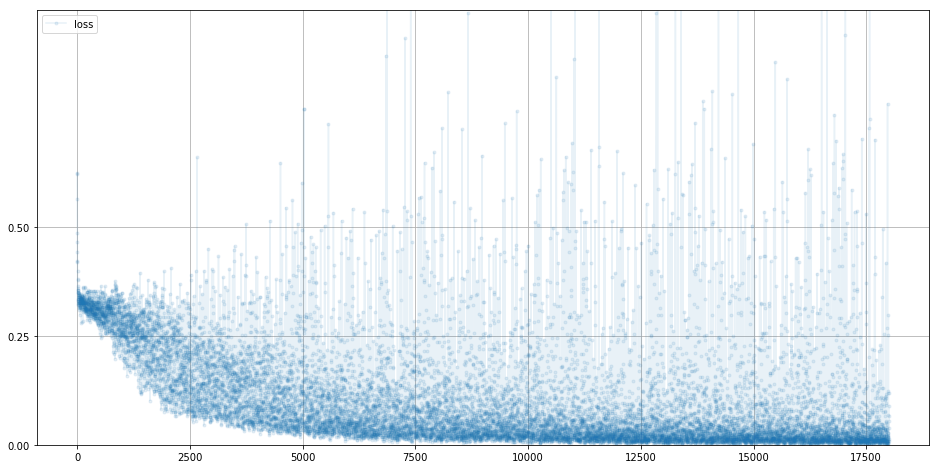

In [60]:
import pandas 

C.plot_progress()

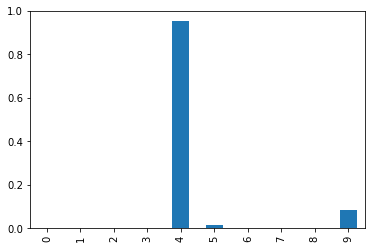

In [62]:
mnist_test_dataset = MnistDataset('./mnist_data/mnist_test.csv')

record = 19

image_data = mnist_test_dataset[record][1]

output = C.forward(image_data)

pandas.DataFrame(output.detach().numpy()).plot(kind='bar', legend=False, ylim=(0,1))

### Method for copying Tensor

Pytroch detach() & clone()

- detach(): 기존 Tensor에서 gradient 전차가 안되는 텐서 생성
    - 단 storage를 공유하기에 detach로 생성한 Tensor가 변경되면 원본 Tensor도 똑같이 변한다.
    
- clone(): 기존 tensor와 내용을 복사한 텐서 생성

### Activation Function

Sigmoid function 기울기를 계산하기가 수학적으로 상당히 간편했기 때문에 초기 신경망에 많이 사용되었다. 

하지만, 단점은 큰 값들에 대해 기울기가 굉장히 작아지다가 사라질 수 있다. -> Gradient Vanishing

기울기가 소실되는 것을 **포화(saturation)** 이라고 부른다.

이런 단점을 대체할 loss function으로 **ReLU(Rectified Linear Unit)** 이다. 고정된 기울기의 직선을 사용하여 기울기가 사라지는 것을 방지한다.

하지만 ReLU는 0이하의 값들의 경사는 모두 0이기 때문에 역시 기울기가 소실되는 문제가 있다.

따라서 0 이하의 경우 미세한 기울기를 허용하여 기울기 소실을 방지한다. 이를 **Leaky ReLU** 라고 부른다.


In [18]:
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.model = nn.Sequential(
            nn.Linear(784, 200),
            nn.LeakyReLU(0.02),
            nn.Linear(200, 10),
            nn.LeakyReLU(0.02)
        )
        
        self.loss = nn.MSELoss()
        self.optimizer = torch.optim.SGD(self.parameters(), lr=0.01)
        
        self.counter = 0
        self.progress = []
        
    def forward(self, inputs):
        return self.model(inputs)
    
    def train(self, inputs, targets):
        outputs = self.forward(inputs)
        loss = self.loss(outputs, targets)
        self.counter += 1
        if (self.counter % 10 == 0):
            self.progress.append(loss.item())
        if (self.counter % 10000 == 0):
            print("counter = ", self.counter)
            pass

        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

    def plot_progress(self):
        df = pandas.DataFrame(self.progress, columns=['loss'])
        df.plot(ylim=(0, 1.0), figsize=(16, 8), alpha=0.1, marker='.', 
               grid=True, yticks=(0, 0.25, 0.5))
        pass
        

In [19]:
C = Classifier()

epochs = 3

for i in range(epochs):
    print("training epoch", i+1, "of", epochs)
    for label, image_data_tensor, target_tensor in mnist_dataset:
        C.train(image_data_tensor, target_tensor)
        pass

training epoch 1 of 3
counter =  10000
counter =  20000
counter =  30000
counter =  40000
counter =  50000
counter =  60000
training epoch 2 of 3
counter =  70000
counter =  80000
counter =  90000
counter =  100000
counter =  110000
counter =  120000
training epoch 3 of 3
counter =  130000
counter =  140000
counter =  150000
counter =  160000
counter =  170000
counter =  180000


In [20]:
import pandas 

C.plot_progress()

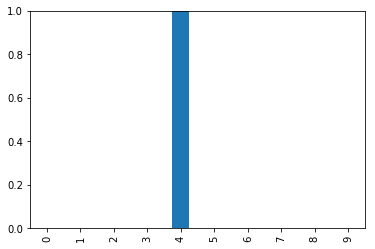

In [21]:
mnist_test_dataset = MnistDataset('./mnist_data/mnist_test.csv')
record = 19
image_data = mnist_test_dataset[record][1]

output = C.forward(image_data)

pandas.DataFrame(output.detach().numpy()).plot(kind='bar', legend=False, ylim=(0,1))

In [22]:
score = 0
items = 0

for label, image_data_tensor, target_tensor in mnist_test_dataset:
    answer = C.forward(image_data_tensor).detach().numpy()
    if (answer.argmax() == label):
        score += 1
        pass
    items += 1
    pass

print(score, items, score/items)

9676 10000 0.9676


기존 Sigmoid 를 사용했을 때 보다 더 좋은 성능을 보임

Activation Function을 변경하는 것은 큰 영향을 미친다. 더 좋은 기울기를 확보할 수 있기 때문이다.

### Optimizer

역전파 시 가중치를 업데이트하는 방식인 옵티마이저를 변경해보자

SGD(Stochastic Gradient Descent)의 단점은 Local Minima(국소적 최적해)에 빠질 확률이 크다는 것이다. 다른 단점은 모든 학습 파라미터에 단일한 학습률을 적용해버린다는 것이다. 

Adam은 성능이 좋다고 알려져있다. 관성을 이용해 국소적 최적해를 통과하고, 학습 파라미터에 대해 각각 다른 학습률을 적용하고, 학습할 때 이 파라미터들을 계속 상황에 따라 수정한다.

In [23]:
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.model = nn.Sequential(
            nn.Linear(784, 200),
            nn.Sigmoid(),
            nn.Linear(200, 10),
            nn.Sigmoid()
        )
        
        self.loss = nn.MSELoss()
        self.optimizer = torch.optim.Adam(self.parameters())
        
        self.counter = 0
        self.progress = []
        
    def forward(self, inputs):
        return self.model(inputs)
    
    def train(self, inputs, targets):
        outputs = self.forward(inputs)
        loss = self.loss(outputs, targets)
        self.counter += 1
        if (self.counter % 10 == 0):
            self.progress.append(loss.item())
        if (self.counter % 10000 == 0):
            print("counter = ", self.counter)
            pass

        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

    def plot_progress(self):
        df = pandas.DataFrame(self.progress, columns=['loss'])
        df.plot(ylim=(0, 1.0), figsize=(16, 8), alpha=0.1, marker='.', 
               grid=True, yticks=(0, 0.25, 0.5))
        pass

In [24]:
C = Classifier()

epochs = 3

for i in range(epochs):
    print("training epoch", i+1, "of", epochs)
    for label, image_data_tensor, target_tensor in mnist_dataset:
        C.train(image_data_tensor, target_tensor)
        pass

training epoch 1 of 3
counter =  10000
counter =  20000
counter =  30000
counter =  40000
counter =  50000
counter =  60000
training epoch 2 of 3
counter =  70000
counter =  80000
counter =  90000
counter =  100000
counter =  110000
counter =  120000
training epoch 3 of 3
counter =  130000
counter =  140000
counter =  150000
counter =  160000
counter =  170000
counter =  180000


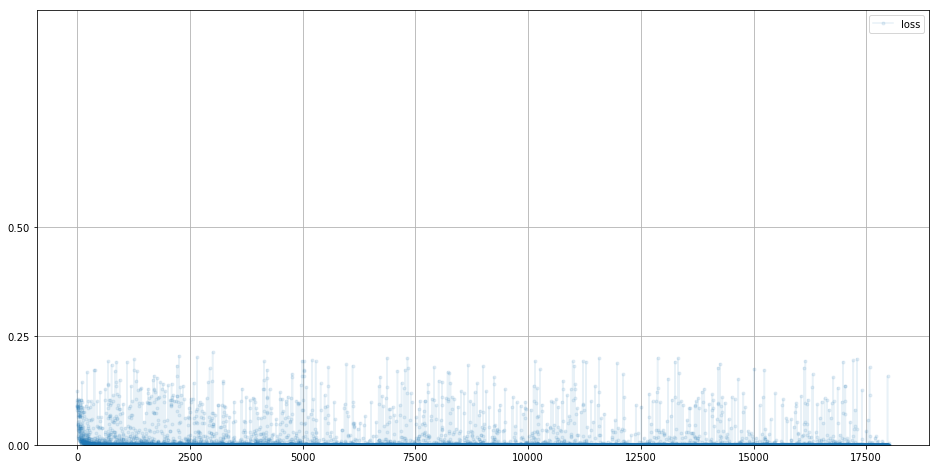

In [26]:
import pandas 

C.plot_progress()

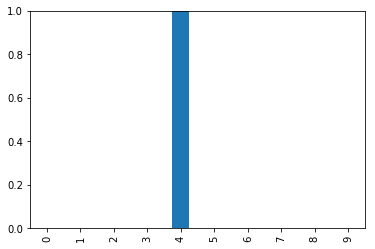

In [27]:
mnist_test_dataset = MnistDataset('./mnist_data/mnist_test.csv')
record = 19
image_data = mnist_test_dataset[record][1]

output = C.forward(image_data)

pandas.DataFrame(output.detach().numpy()).plot(kind='bar', legend=False, ylim=(0,1))

In [28]:
score = 0
items = 0

for label, image_data_tensor, target_tensor in mnist_test_dataset:
    answer = C.forward(image_data_tensor).detach().numpy()
    if (answer.argmax() == label):
        score += 1
        pass
    items += 1
    pass

print(score, items, score/items)

9716 10000 0.9716


### 정규화

신경망의 가중치와 여러 신호들은 큰 값을 가질 때가 있다. 이 경우 중요한 값이 소실되는 결과가 나올 수 있고, 이는 훈련을 어렵게 한다.

파라미터들의 범위를 감소시키거나, 평균을 0으로 맞춰주는 작업이 도움이 된다는 연구 결과들이 있다.

이러한 방법을 **정규화(Normalization)** 이라고 한다.


Regularization도 역시 정규화로 옮겨져 혼란이 있다.
제약을 거는 것, L1, L2 Regularization이 있다.

In [29]:
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.model = nn.Sequential(
            nn.Linear(784, 200),
            nn.LeakyReLU(0.02),
            nn.LayerNorm(200),
            nn.Linear(200, 10),
            nn.LeakyReLU(0.02)
        )

        self.loss_function = nn.MSELoss()

        self.optimiser = torch.optim.SGD(self.parameters(), lr=0.01)

        self.counter = 0
        self.progress = []

        pass
    
    
    def forward(self, inputs):
        return self.model(inputs)
    
    
    def train(self, inputs, targets):
        outputs = self.forward(inputs)
        
        loss = self.loss_function(outputs, targets)

        self.counter += 1
        if (self.counter % 10 == 0):
            self.progress.append(loss.item())
            pass
        if (self.counter % 10000 == 0):
            print("counter = ", self.counter)
            pass

        self.optimiser.zero_grad()
        loss.backward()
        self.optimiser.step()

        pass
    
    
    def plot_progress(self):
        df = pandas.DataFrame(self.progress, columns=['loss'])
        df.plot(ylim=(0, 1.0), figsize=(16,8), alpha=0.1, marker='.', grid=True, yticks=(0, 0.25, 0.5))
        pass
    
    pass

In [30]:
C = Classifier()

epochs = 3

for i in range(epochs):
    print("training epoch", i+1, "of", epochs)
    for label, image_data_tensor, target_tensor in mnist_dataset:
        C.train(image_data_tensor, target_tensor)
        pass

training epoch 1 of 3
counter =  10000
counter =  20000
counter =  30000
counter =  40000
counter =  50000
counter =  60000
training epoch 2 of 3
counter =  70000
counter =  80000
counter =  90000
counter =  100000
counter =  110000
counter =  120000
training epoch 3 of 3
counter =  130000
counter =  140000
counter =  150000
counter =  160000
counter =  170000
counter =  180000


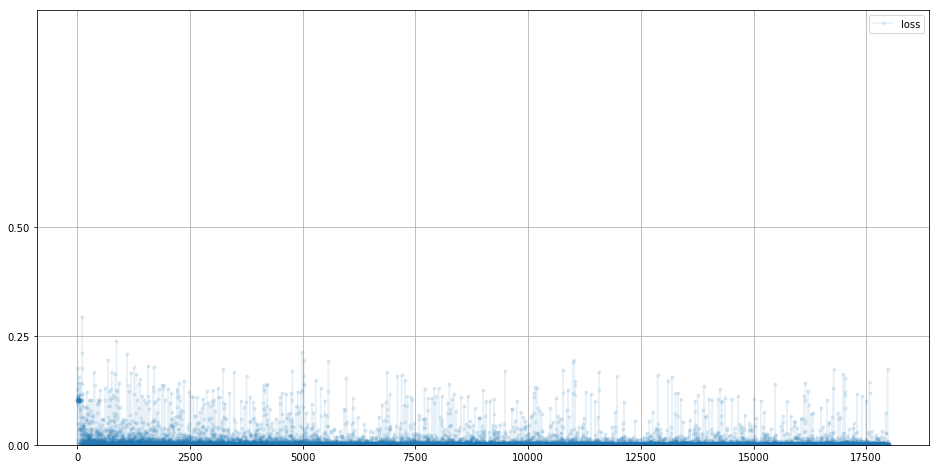

In [31]:
import pandas 

C.plot_progress()

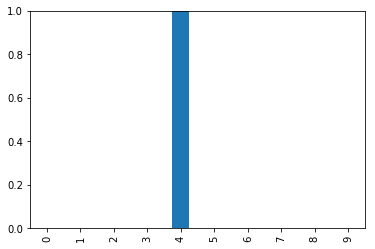

In [32]:
mnist_test_dataset = MnistDataset('./mnist_data/mnist_test.csv')
record = 19
image_data = mnist_test_dataset[record][1]

output = C.forward(image_data)

pandas.DataFrame(output.detach().numpy()).plot(kind='bar', legend=False, ylim=(0,1))

In [33]:
score = 0
items = 0

for label, image_data_tensor, target_tensor in mnist_test_dataset:
    answer = C.forward(image_data_tensor).detach().numpy()
    if (answer.argmax() == label):
        score += 1
        pass
    items += 1
    pass

print(score, items, score/items)

9729 10000 0.9729


### 복합적 성능 향상 기법

BCELoss() + LeakyReLU() + Adam() + LayerNorm()

In [34]:
# classifier class

class Classifier(nn.Module):
    
    def __init__(self):
        # initialise parent pytorch class
        super().__init__()
        
        # define neural network layers
        self.model = nn.Sequential(
            nn.Linear(784, 200),
            nn.LeakyReLU(0.02),
            nn.LayerNorm(200),            
            nn.Linear(200, 10),
            nn.Sigmoid()
        )
        
        # create loss function
        self.loss_function = nn.BCELoss()
        #self.loss_function = nn.MSELoss()

        # create optimiser, using simple stochastic gradient descent
        #self.optimiser = torch.optim.SGD(self.parameters(), lr=0.01)
        self.optimiser = torch.optim.Adam(self.parameters())

        # counter and accumulator for progress
        self.counter = 0
        self.progress = []

        pass
    
    
    def forward(self, inputs):
        # simply run model
        return self.model(inputs)
    
    
    def train(self, inputs, targets):
        # calculate the output of the network
        outputs = self.forward(inputs)
        
        # calculate loss
        loss = self.loss_function(outputs, targets)

        # increase counter and accumulate error every 10
        self.counter += 1
        if (self.counter % 10 == 0):
            self.progress.append(loss.item())
            pass
        if (self.counter % 10000 == 0):
            print("counter = ", self.counter)
            pass

        # zero gradients, perform a backward pass, and update the weights
        self.optimiser.zero_grad()
        loss.backward()
        self.optimiser.step()

        pass
    
    
    def plot_progress(self):
        df = pandas.DataFrame(self.progress, columns=['loss'])
        df.plot(ylim=(0, 1.0), figsize=(16,8), alpha=0.1, marker='.', grid=True, yticks=(0, 0.25, 0.5))
        pass
    
    pass

In [35]:
C = Classifier()

epochs = 3

for i in range(epochs):
    print("training epoch", i+1, "of", epochs)
    for label, image_data_tensor, target_tensor in mnist_dataset:
        C.train(image_data_tensor, target_tensor)
        pass

training epoch 1 of 3
counter =  10000
counter =  20000
counter =  30000
counter =  40000
counter =  50000
counter =  60000
training epoch 2 of 3
counter =  70000
counter =  80000
counter =  90000
counter =  100000
counter =  110000
counter =  120000
training epoch 3 of 3
counter =  130000
counter =  140000
counter =  150000
counter =  160000
counter =  170000
counter =  180000


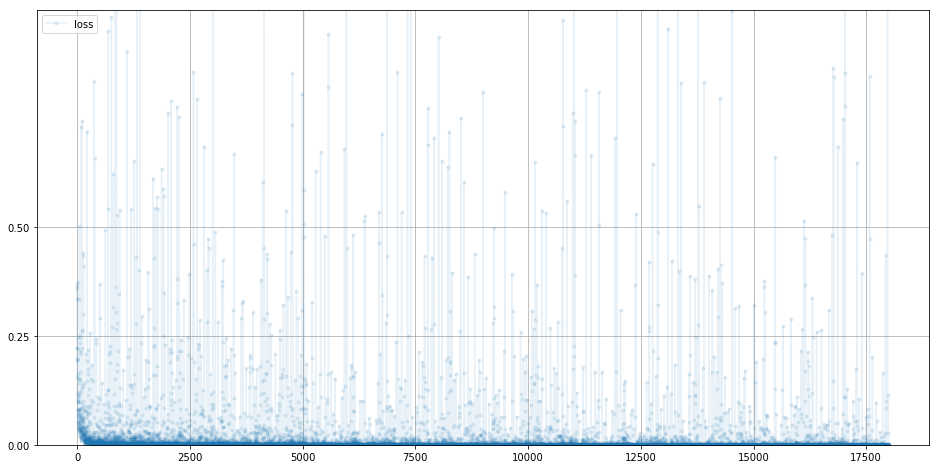

In [36]:
import pandas 

C.plot_progress()

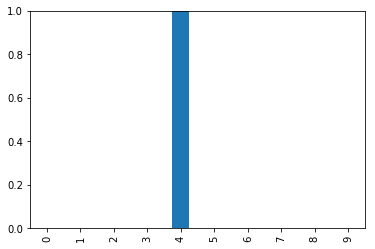

In [37]:
mnist_test_dataset = MnistDataset('./mnist_data/mnist_test.csv')
record = 19
image_data = mnist_test_dataset[record][1]

output = C.forward(image_data)

pandas.DataFrame(output.detach().numpy()).plot(kind='bar', legend=False, ylim=(0,1))

In [38]:
score = 0
items = 0

for label, image_data_tensor, target_tensor in mnist_test_dataset:
    answer = C.forward(image_data_tensor).detach().numpy()
    if (answer.argmax() == label):
        score += 1
        pass
    items += 1
    pass

print(score, items, score/items)

9713 10000 0.9713


### Summary

- 새로운 워크플로우를 만들 때, 데이터를 **미리 살펴보고** 시작하는 것은 좋은 습관

- 신경망은 Pytorch의 **nn.Module** Class로 부터 시작

- 훈련의 진행을 알기위해 **손실값** 을 시각화 하자

- MSE Loss는 **회귀** 문제에 적합, BCELoss는 **분류** 문제에 적합하다.

- **Sigmoid function** 은 **기울기 소실** 문제 발생 가능, 해결책인 **ReLU** 는 **양의 입력** 에 대해 적절한 기울기를 가진다. LeakyReLU는 음의 입력값에 대해서도 약간의 기울기를 가져 조금 더 나은 결과를 유도한다.

- **Adam** 은 국소적 최적해를 해결, 각 학습 파라미터마다 다른 학습률을 적용한다. 대체적으로 SGD 보다 나은 성능을 보인다.
    - CNN에서 이미지 분류시에 Adam 보다 SGD가 더 좋은 성능을 보인다.(Stanford Dog classification 실험을 통해 확인)
    
- **정규화** 는 **신경망 훈련을 안정화**시킨다. 신경망의 초기 가중치를 정규화하는 것은 일반적인 일이다.

## Chapter 4 CUDA 기초

### Numpy V.S Python

Numpy를 이용해 행렬곱을 하면 레이어들을 통과하면서 할 계산이 줄어든다. Numpy는 더 효율적으로 메모리에 접근하여 행렬을 처리한다. 병렬 처리 같은 CPU의 특별한 기능들을 좀 더 효율적으로 이용하기도 한다.

In [5]:
import numpy
import torch

size = 600
a = numpy.random.rand(size, size)
b = numpy.random.rand(size, size)

In [6]:
%%timeit

x = numpy.dot(a, b)

100 loops, best of 3: 2 ms per loop


%timeit: 코드를 여러 번 실행해 컴퓨터 어딘가 동시에 실행될 수 있는 다른 프로세스의 영향력을 줄이고 측정을 한다.

In [7]:
%%timeit

c = numpy.zeros((size, size))

for i in range(size):
    for j in range(size):
        for k in range(size):
            c[i, j] += a[i, k] * b[k, j]
        pass
    pass

KeyboardInterrupt: 

numpy.dot을 사용했을 때와 Python으로 계산 시 시간의 차이가 크다. 하지만 이 테스트는 과학적이지 않다. 제대로 성능 테스트를 하려면 더 많은 테스트를 돌리고 좀 더 엄격하게 설정해야한다. Numpy가 순수 Python Matric product 계산이 훨씬 빠르다는 것만 인지하다.

실제 신경망에서 훈련에는 훨씬 많은 시간이 걸린다. 단순히 넘파이를 사용하는 것 만으로도 오래 걸려서 컴퓨터의 하드웨어로부터 나은 성능을 얻기 위해 연구를 하였다.

### Nvidia CUDA

컴퓨터는 연산을 처리하는 CPU(Central Processing Unit)을 가지고 있다. Python 코드는 이것을 기반으로 돌아간다. 

GPU(Graphics Processing Unit)는 특정한 작업만 잘하도록 설계되었다. 그중 하나가 단순 계산을 잘하는 것이다. 단순 계산에 병렬로 행렬곱을 처리하는 것이 포함이 된다.

CPU는 아무리 코어가 많다고 해도 64 core 정도가 최대이다. 하지만 GPU는 많은 연산 코어들이 존재한다. 오늘날에 천 개 이상의 코어가 일반적이다. 이는 굉장히 많은 연산이 쪼개져서 병렬로 계산될 수 있음을 의미한다.

엔비디아는 GPU 시장의 리더 역할을 하고 있다. 강력한 HW 가속 기능을 갖춘, 머신러닝 연구에 표준적인 SW 툴을 제공한다. 이 software framework를 **CUDA(Compute Unified Device Architecture)** 라고 부른다.

CUDA의 단점은 NVIDIA의 GPU에서만 동작을 한다. 경쟁사인 AMD는 최근 비슷한 프레임워크를 개발했다. 

In [8]:
x = torch.tensor(3.5)

In [9]:
# 더 명확하게 데이터 타입을 정의
x = torch.FloatTensor([3.5])

In [10]:
# .type()을 통해 데이터 타입 확인
x.type()

'torch.FloatTensor'

In [11]:
# GPU에서 tensor 만들기
x = torch.cuda.FloatTensor([3.5])

TypeError: type torch.cuda.FloatTensor not available. Torch not compiled with CUDA enabled.

In [13]:
# .device를 통해 어떤 장치에 tensor가 올라가 있는지 확인 가능
x.device

device(type='cpu')